## Import and Initialization

In [21]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow

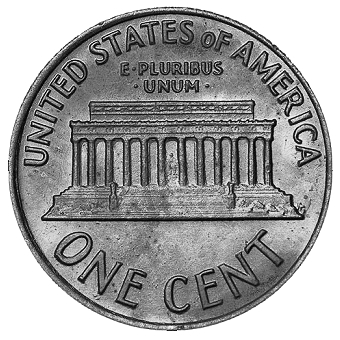

In [27]:
img = cv.imread("momo.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)

## Low Pass Filter

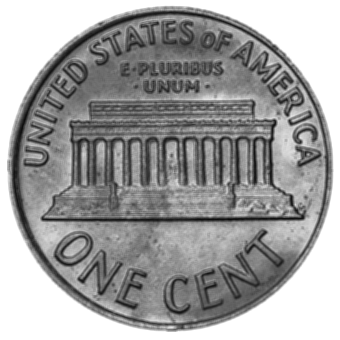

In [39]:
# Applying a basic low pass filter :-
kernel = np.ones((3, 3), np.float32) / 9
dst = cv.filter2D(img, -1, kernel)
cv2_imshow(dst)

## Canny edge detection

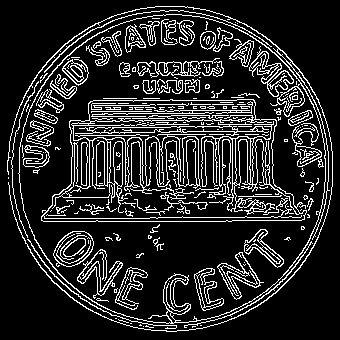

In [56]:
# Canny edge detection on smooth image:-
dst2 = cv.Canny(dst, 75, 150, L2gradient=True)
cv2_imshow(dst2)

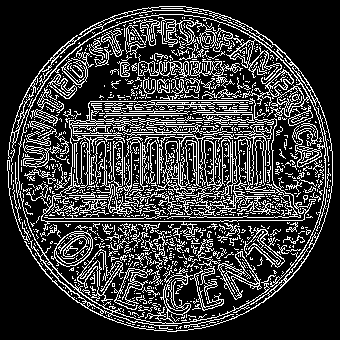

In [57]:
# Canny edge detection on original image :-
dst3 = cv.Canny(img, 75, 150, L2gradient=True)
cv2_imshow(dst3) 

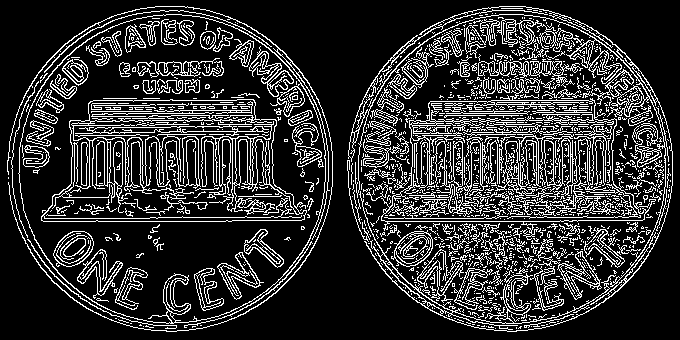

In [59]:
# Comparison between original and smooth image :-
cv2_imshow(np.hstack((dst2, dst3)))